In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#ANALYSING DATA

In [122]:
titanic.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

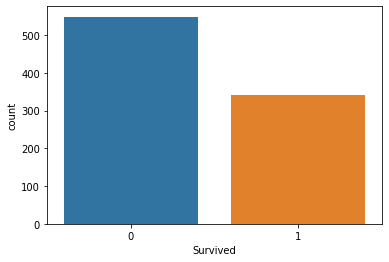

In [123]:
sns.countplot(x="Survived",data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

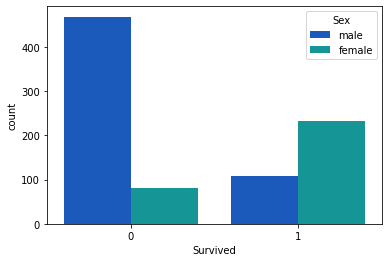

In [124]:
sns.countplot(x="Survived",hue='Sex',data=titanic,palette='winter')

<AxesSubplot:ylabel='Frequency'>

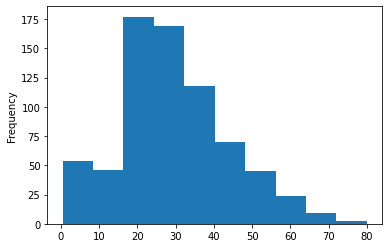

In [125]:
titanic['Age'].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

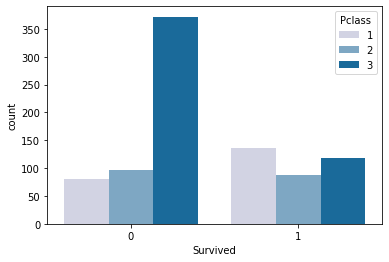

In [126]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='PuBu')

<AxesSubplot:ylabel='Frequency'>

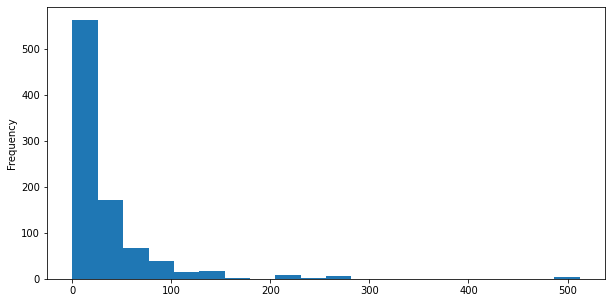

In [89]:
titanic['Fare'].plot.hist(bins=20,figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

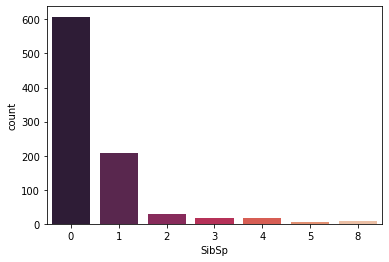

In [127]:
sns.countplot(x='SibSp',data=titanic,palette='rocket')

<AxesSubplot:ylabel='Frequency'>

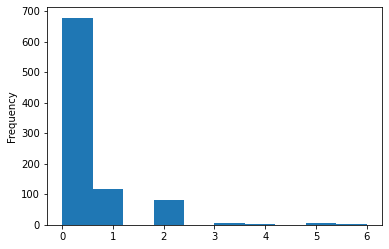

In [128]:
titanic['Parch'].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

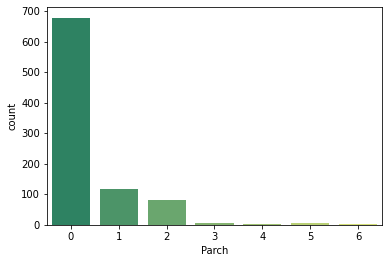

In [129]:
sns.countplot(x='Parch',data=titanic,palette='summer')

In [130]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

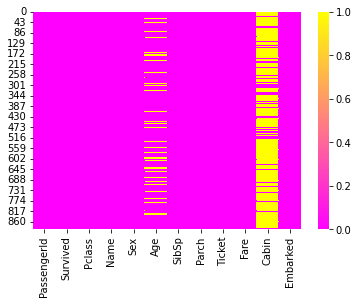

In [131]:
sns.heatmap(titanic.isnull(),cmap='spring')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

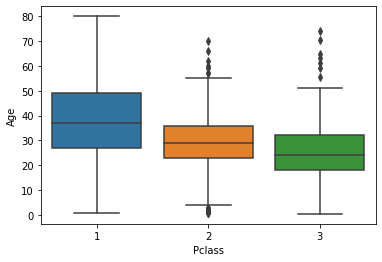

In [95]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [132]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [133]:
titanic.drop('Cabin',axis=1,inplace=True)

In [134]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [135]:
titanic.dropna(inplace=True)

<AxesSubplot:>

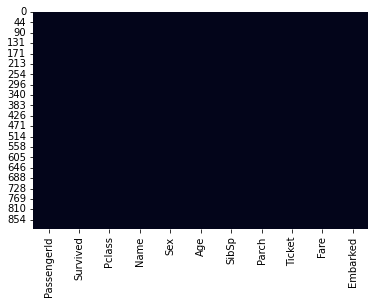

In [136]:
sns.heatmap(titanic.isnull(),cbar=False)

In [137]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [138]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [139]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [140]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [141]:
embark=pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [142]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [143]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [144]:
Pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [146]:
titanic=pd.concat([titanic,sex,embark,Pcl],axis=1)

In [147]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [148]:
titanic.drop(['Name','PassengerId','Pclass','Ticket','Sex','Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [163]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [164]:
from sklearn.model_selection import train_test_split


In [165]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=4)

In [169]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

c:\Users\Keerthana Shivaratri\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
prediction=lm.predict(x_test)

In [161]:
from sklearn.metrics import classification_report

In [171]:
from sklearn.metrics import classification_report

In [173]:
from sklearn.metrics import confusion_matrix

In [175]:
from sklearn.metrics import accuracy_score

In [176]:
accuracy_score(y_test,prediction)

0.7957446808510639